In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# Preliminaries

In [2]:
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0    # Just be careful that t0 != t1 and sol1 != beta
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)    # This is the update function
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    '''
    First find the derivative t that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

# Problem 1

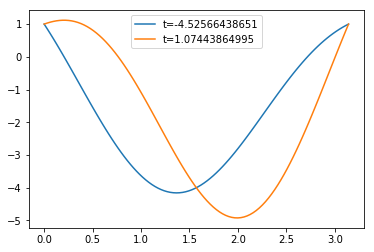

In [3]:
# Initial COnditions
a = 0
b = np.pi
alpha = 1
beta = 1
max_I = 100
t0 = 0
t1 = -1
s0 = 0
s1 = 1

# 2 different solutions. You may need to adjust t0, t1, s0, s1 above
X = np.linspace(a,b,max_I)
Y1 = solveSecant(ode, X, a, b, alpha, beta, t0, t1, max_I)
Y2 = solveSecant(ode, X, a, b, alpha, beta, s0, s1, max_I)

#for graphing purposes only
t2 = find_t(ode, a, b, alpha, beta, t0, t1, max_I)
s2 = find_t(ode, a, b, alpha, beta, s0, s1, max_I)

plt.plot(X, Y1, label='t='+str(t2))
plt.plot(X, Y2, label='t='+str(s2))
plt.legend(loc=0)
plt.show()

# Problem 2

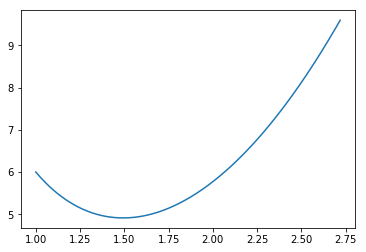

In [4]:
def find_t(f,a,b,alpha,beta,z,zprime,t0,maxI):
    y = 0
    i = 0
    while abs(y-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0,z,zprime]), [a,b],atol=1e-10)[1]    # Make sure you solve for z using the second differential equation. Make sure to return the z value.
        t1 = t0 - (sol0[0] - beta)/sol0[2]    # New update function where you divide by z
        t0 = t1
        i = i+1
        y = sol0[0]
    return t1

def solveSecant(f,X,a,b,alpha,beta,z,zprime,t0,maxI):
    t = find_t(f,a,b,alpha,beta,z,zprime,t0,maxI)
    sol = odeint(f,np.array([alpha,t,z,zprime]), X,atol=1e-10)[:,0]
    return sol

# Here y is length 4. This corresponds to [y, y', z, z'], where you solve both differential equations simultaneously.
def ode2(y,x):
    return np.array([y[1],3+2.*y[0]/x**2,y[3],y[2]*2./x**2])

# Initial Conditions
a = 1
b = np.e
alpha = 6
beta = np.e**2+6/np.e
z = 0
zprime = 1

max_I = 1000
t0 = 0

X = np.linspace(a,b,max_I)
Y = solveSecant(ode2, X, a, b, alpha, beta, z, zprime, t0, max_I)

plt.plot(X, Y)
plt.show()

# Problem 3

C:\Users\Joey\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


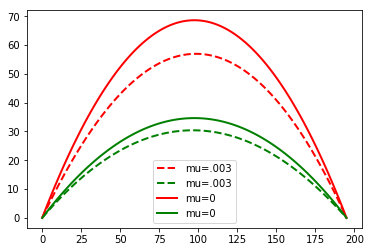

In [5]:
def find_theta(f,a,b,v,alpha,beta,t0,t1,maxI):
    sol1 = odeint(f,np.array([alpha,v,t1]), [a,b],atol=1e-10)[1,0]
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,v,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,v,t1]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,vel,alpha,beta,t0,t1,maxI):
    theta = find_theta(f,a,b,vel,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,vel,theta]), X,atol=1e-10)[:,0]
    return sol

# Now the function is length 3, with outputs [y', v', theta']
def ode3(y,x):
    return np.array([np.tan(y[2]),-(g*np.sin(y[2])+mu*y[1]**2)/(y[1]*np.cos(y[2])),-g/(y[1]**2)])

#Initial Conditions
a = 0
b = 195
alpha = 0
beta = 0
v = 45
mu = .0003
g = 9.8067
max_I = 100
X = np.linspace(a,b,max_I)

t0 = 0
t1 = 1
Y1 = solveSecant(ode3, X, a, b, v, alpha, beta, t0, t1, max_I)

t0 = 1
t1 = 6
Y2 = solveSecant(ode3, X, a, b, v, alpha, beta, t0, t1, max_I)

# Plot two solutions without air resistance.
mu = 0

t0 = 0
t1 = 1
Y3 = solveSecant(ode3, X, a, b, v, alpha, beta, t0, t1, max_I)

t0 = 1
t1 = 6
Y4 = solveSecant(ode3, X, a, b, v, alpha, beta, t0, t1, max_I)

plt.plot(X, Y1, '--r', linewidth=2, label='mu=.0003')
plt.plot(X, Y2, '--g', linewidth=2, label='mu=.0003')
plt.plot(X, Y3, '-r', linewidth=2, label='mu=0')
plt.plot(X, Y4, '-g', linewidth=2, label='mu=0')
plt.legend(loc='lower center')
plt.show()